## Tide Prediction Module Functions

 - <b>retrieve_constituents</b> - retrieves harmonic constituents from NOAA gauge station
 - <code><b>fetch_noaa_tide_data()</b></code> - retrieves datetimes, water levels and tide predictions at given NOAA tide station from NOAA's API
 
 - <b>datetimes</b> - prepares a collection of datetimes from beginning to end dates if needed
 
 - <code><b>predict_tide()</b></code> - predicts tide for desired NOAA station given station ID, start date and end date for prediction 
 - <b>datum_value</b> - retrieves datum value for desired datum reference, utilized by <b>predict_tide</b> to obtain <b>MTL</b> value
 - <code><b>detide()</b></code> - detides observed water levels with predicted tide
 - <code><b>surge()</b></code> - predicts surge at NOAA gauge station provided station ID, start date, end date, and landfall date, best for a Clawpack Simulation!

# Example of Tide Prediction For One Date Instance

- In this example, method used to predict tide is adapated from Pytides
- This implementation will only work for known NOAA gauge stations
- Harmonic Constituents data is scraped from NOAA. 

In [1]:
import matplotlib.pyplot as plt
import datetime
import clawpack.geoclaw.tide as tide

%env CLAW=/Users/jonathansocoy/clawpack

env: CLAW=/Users/jonathansocoy/clawpack


### ****  Station Information ****

Locate NOAA station ID.  NOAA gauge stations home: https://tidesandcurrents.noaa.gov/ <br>
Fill in station ID, reference datum and date instance for tide prediction!

In [2]:
#Station Information
station_id = '8761724'
datum = 'MTL'

#Date of prediction (YEAR, MTH, DAY, HR)
prediction_date = datetime.datetime(2005, 8, 29, 11)

### Tide Prediction

Prediction of tide at specified location (station ID) and specified time (GMT) implemented below by calling <code><b>predict_tide()</b></code> method with the following arguments: <b> station_id, beg_prediction_date, end_prediction_date</b>. Note: datum argument is optional

<br> 

To predict tide at an instant, set <b>beg_prediction_date</b> and <b>end_prediction_date</b> in <code><b>predict_tide()</b></code> method to the same date!

In [3]:
#NOAA Data Scraping Implementation      
height = tide.predict_tide(station_id, prediction_date, prediction_date, datum='MTL')
times = tide.datetimes(prediction_date, prediction_date) # in meters
print(height[0], "meters")

Using cached constituent data for station 8761724
0.29132825138565854 meters


*******************************************************************************************************************

# Example of Tide Prediction In A Date Interval 

###   Station Information 

Fill in station ID, a beginning date and an end date for tide prediction below

In [4]:
#Station Information
station_id = '8761724'
datum = 'MTL'

#Beginning and End Dates 
beg_date = datetime.datetime(2005, 8, 26, hour=0)
end_date = datetime.datetime(2005, 8, 31, hour=0)

#Predict tide with arguments set as: (station_id, beg_prediction_date, end_prediction_date)
predicted_tide = tide.predict_tide(station_id, beg_date, end_date, datum='MTL')

Using cached constituent data for station 8761724


### Tide Predictions
Plot results in a time series plot

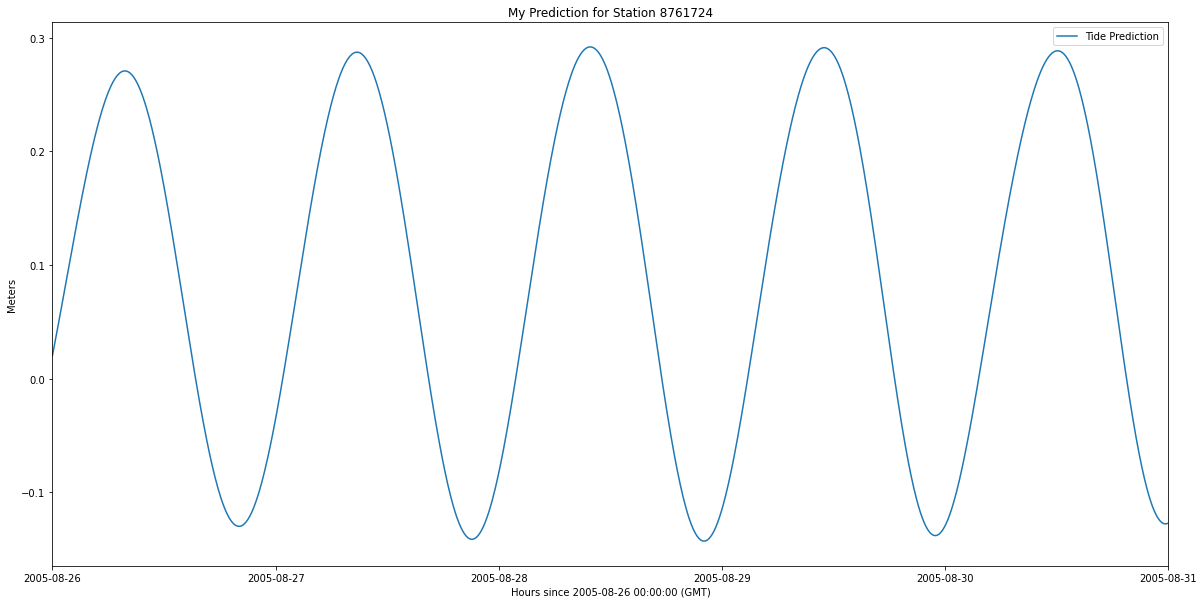

In [5]:
#Method datetimes() makes a range of datetimes given arguments: (beg_prediction_date, end_prediction_date)
times = tide.datetimes(beg_date, end_date)

plt.figure(figsize=(20,10))
plt.plot(times, predicted_tide, "-", label="Tide Prediction")
plt.xlabel('Hours since ' + str(beg_date) + ' (GMT)')
plt.ylabel('Meters'), plt.margins(x=0), plt.legend(loc = 'best')
plt.title('My Prediction for Station {}'.format(station_id))
plt.show()

*******************************************************************************************************************

# Example Comparing NOAA vs Our Tide Prediction In A Date Interval 

In [6]:
#Station Information
station_id = '8761724'
datum = 'MTL'

#Beginning and End Dates 
beg_date = datetime.datetime(2005, 8, 26)
end_date = datetime.datetime(2005, 8, 31)

#Predict Tide 
predicted_tide = tide.predict_tide(station_id, beg_date, end_date, datum='MTL')

Using cached constituent data for station 8761724


- Calling function <code><b>fetch_noaa_tide_data()</b></code> with arguments set as <b>(station_id, beg_prediction_date, end_prediction_date)</b> retrieves datetimes, water levels and tide predictions for the specified NOAA station in the date interval provided from NOAA's API
- Data is scraped in <b>Metric</b> units, <b>GMT</b> timezone, <b>MTL</b> datum and  <b>6 min</b> intervals. These arguments are optional in <code><b>fetch_noaa_tide_data()</b></code>.

In [7]:
#Retrieve NOAA Tide Data
times, NOAA_observed_water_lvl, NOAA_predicted_tide = tide.fetch_noaa_tide_data(station_id, beg_date, end_date, datum='MTL')

Using cached water_level data for station 8761724
Using cached predictions data for station 8761724


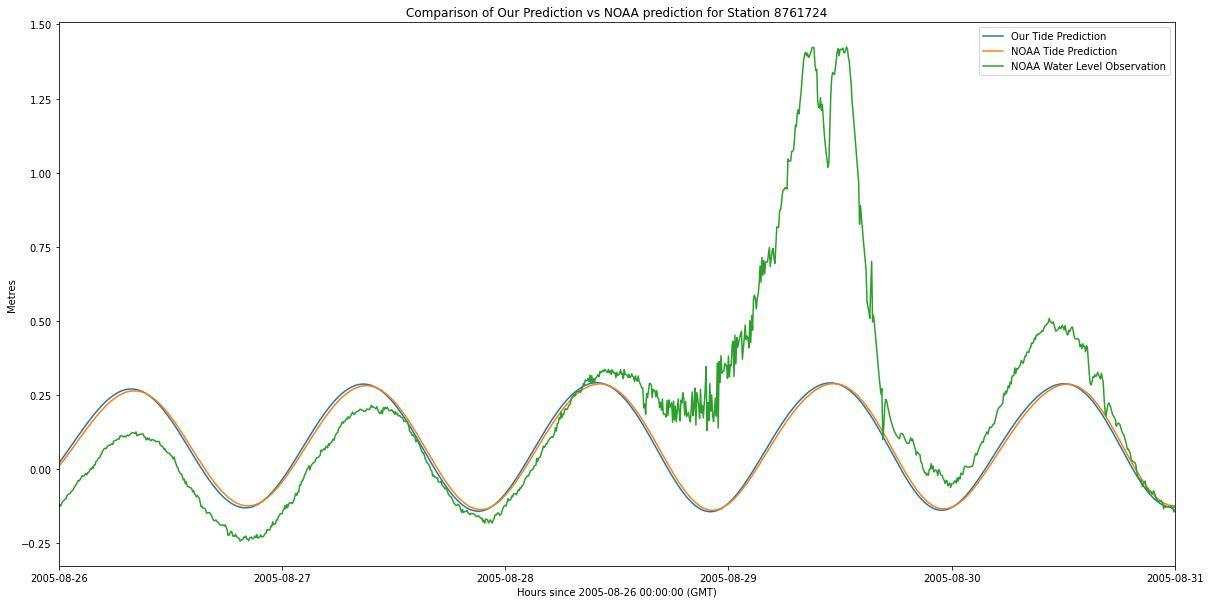

In [8]:
#Plot Comparisons
plt.figure(figsize=(20,10))
plt.plot(times, predicted_tide, "-", label="Our Tide Prediction")
plt.plot(times, NOAA_predicted_tide, "-", label="NOAA Tide Prediction")
plt.plot(times, NOAA_observed_water_lvl, "-", label="NOAA Water Level Observation")
plt.xlabel('Hours since ' + str(beg_date) + ' (GMT)')
plt.ylabel('Metres'), plt.margins(x=0), plt.legend(loc = 'best')
plt.title('Comparison of Our Prediction vs NOAA prediction for Station {}'.format(station_id))
plt.show()

*******************************************************************************************************************

# Example Detiding and Capturing A Surge for a Gauge Station 

- Calling <code><b>predict_tide()</b></code> method with arguments set as: <b>(station_id, beg_prediction_date, end_prediction_date)</b> outputs predicted tide
- Calling <code><b>fetch_noaa_tide_data()</b></code> with arguments set as <b>(station_id, beg_prediction_date, end_prediction_date)</b> retrieves datetimes, water levels and tide predictions from NOAA
- Calling <code><b>detide()</b></code> method with arguments set as: <b>(NOAA observed water level, predicted tide)</b> will output detided water level. 

Using cached constituent data for station 8761724
Using cached water_level data for station 8761724
Using cached predictions data for station 8761724


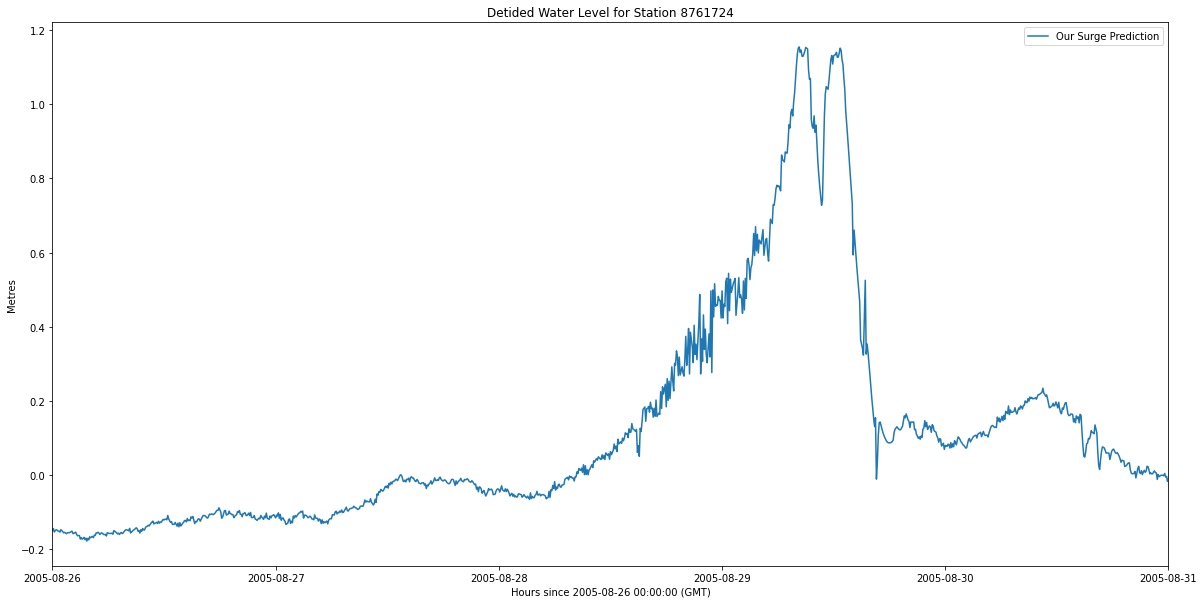

In [9]:
#Station Information
station_id = '8761724'
datum = 'MTL'

#Beginning and End Dates 
beg_date = datetime.datetime(2005, 8, 26)
end_date = datetime.datetime(2005, 8, 31)

predicted_tide = tide.predict_tide(station_id, beg_date, end_date)
times, NOAA_observed_water_lvl, NOAA_predicted_tide = tide.fetch_noaa_tide_data(station_id, beg_date, end_date, datum='MTL')

surge = tide.detide(NOAA_observed_water_lvl, predicted_tide)

#Plot Comparisons
plt.figure(figsize=(20,10))
plt.plot(times, surge, "-", label="Our Surge Prediction")
plt.xlabel('Hours since ' + str(beg_date) + ' (GMT)')
plt.ylabel('Metres'), plt.margins(x=0), plt.legend(loc = 'best')
plt.title('Detided Water Level for Station {}'.format(station_id))
plt.show()

*******************************************************************************************************************

# Example for Clawpack Storm Surge Implementation

- Code below works best if placed in <b>gauge_afteraxes( )</b> in <b>setplot.py</b> for a storm simulation.
- Calling <code><b>surge()</b></code> method with arguments set as: <b>(station_id, beginning_date, end_date, landfall_date)</b> will output storm surge from NOAA observed water levels and predicted tide.

In [10]:
import clawpack.geoclaw.tide as tide
import datetime

Using cached constituent data for station 8761724
Using cached water_level data for station 8761724
Using cached predictions data for station 8761724


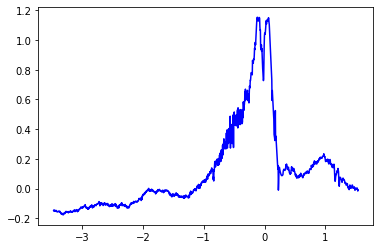

In [11]:
#Station Information
station_id = '8761724'

#Beginning, End, Landfall Dates
beg_date = datetime.datetime(2005, 8, 26)
end_date = datetime.datetime(2005, 8, 31)
landfall_date = datetime.datetime(2005, 8, 29, 11, 10)

# Surge Prediction
times, surge = tide.surge(station_id, beg_date, end_date, landfall_date)
plt.plot(times, surge, color="b", label="Our Prediction")

*******************************************************************************************************************

# Example Iterating Through A Library Of Stations And Date Intervals

In [12]:
import clawpack.geoclaw.tide as tide
import datetime

Using cached constituent data for station 8761724
Using cached water_level data for station 8761724
Using cached predictions data for station 8761724


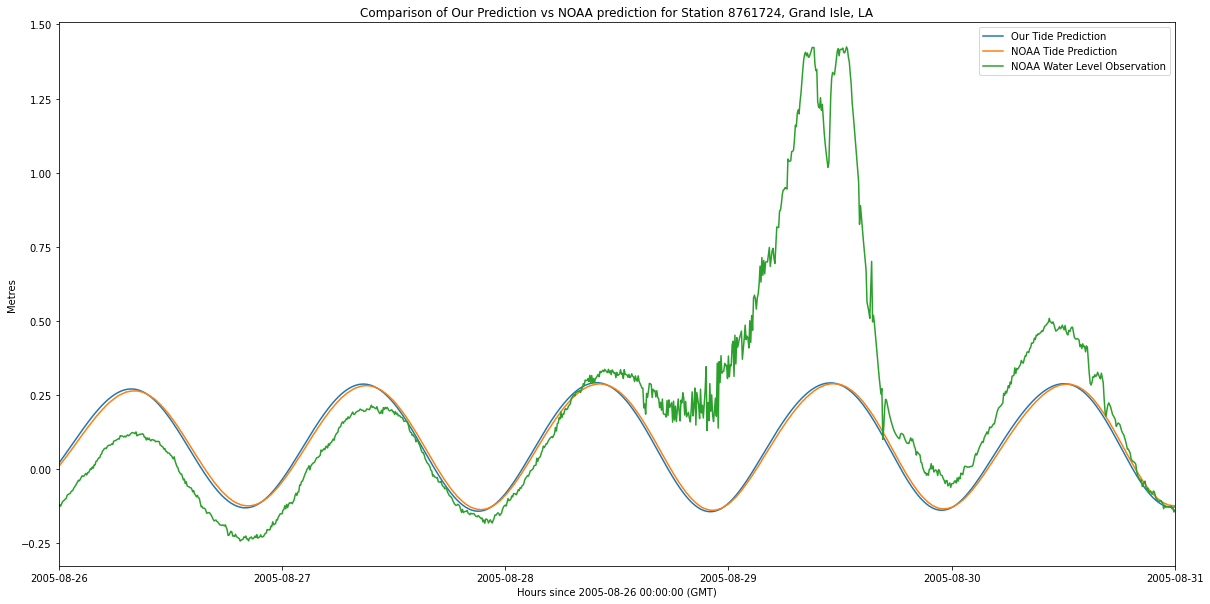

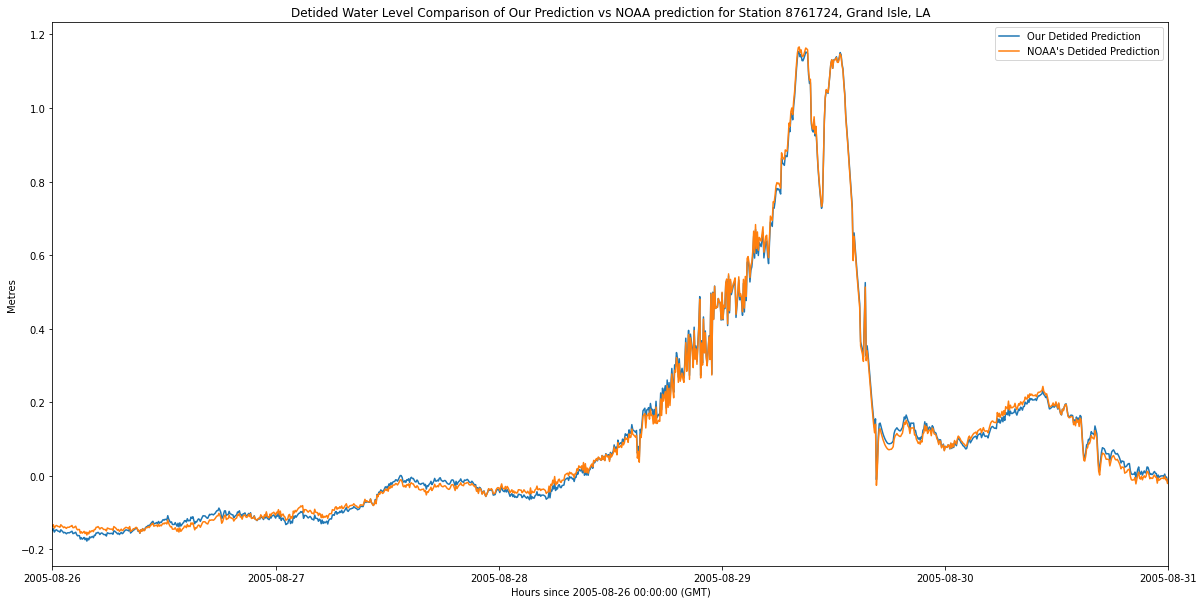

Using cached constituent data for station 8761724
Using cached water_level data for station 8761724
Using cached predictions data for station 8761724
Using cached constituent data for station 8760922
Using cached water_level data for station 8760922
Using cached predictions data for station 8760922


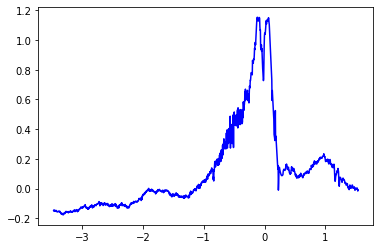

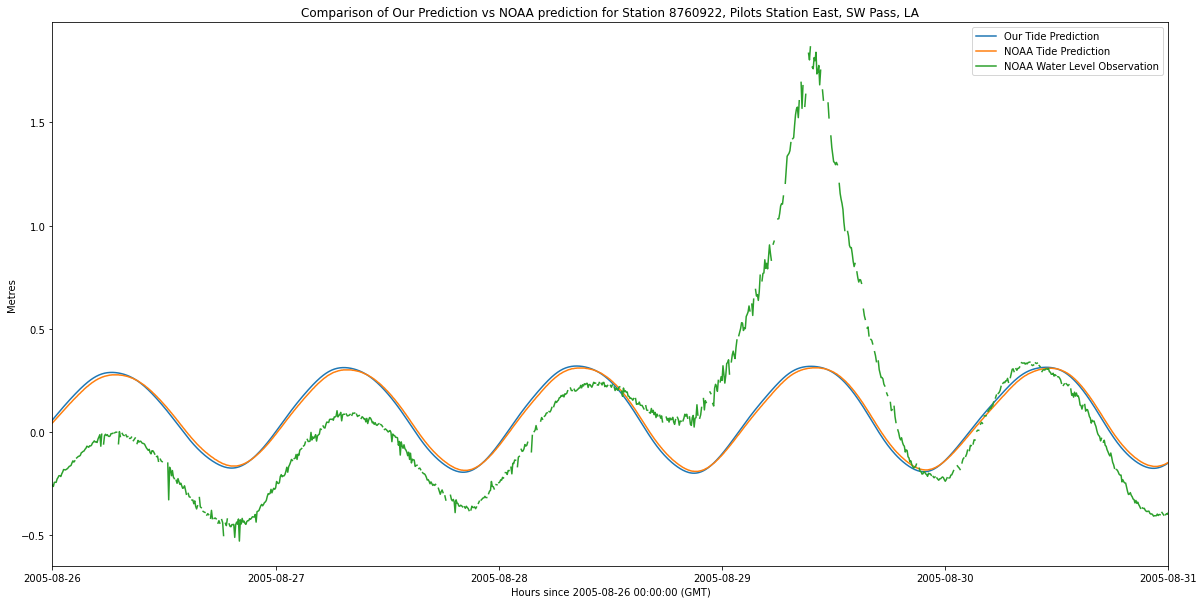

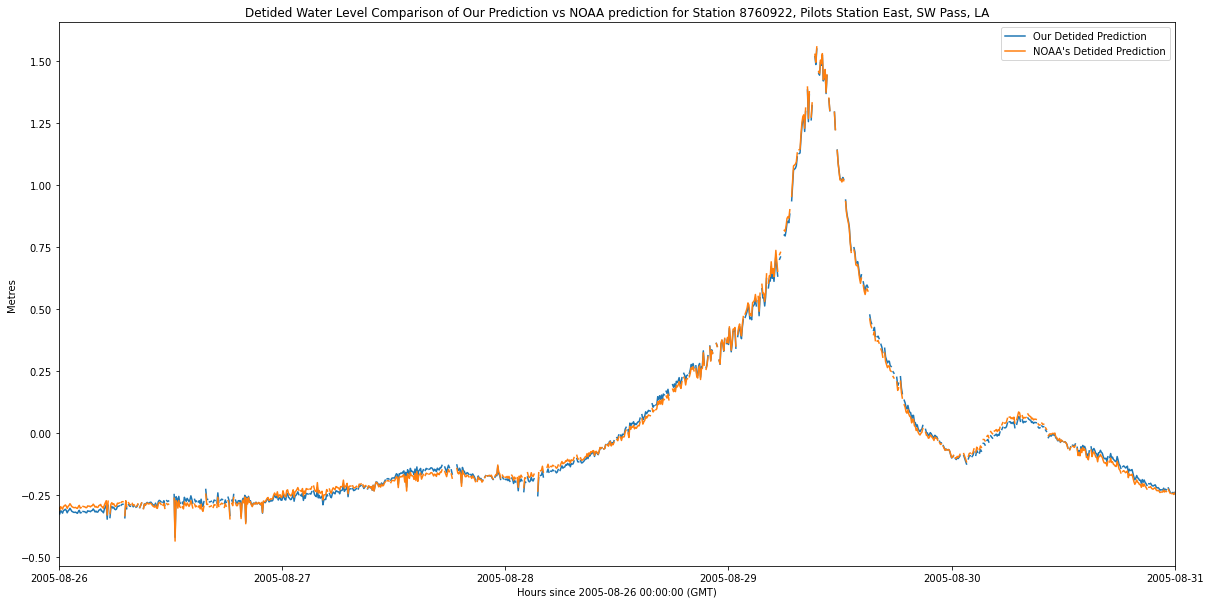

Using cached constituent data for station 8760922
Using cached water_level data for station 8760922
Using cached predictions data for station 8760922
Using cached constituent data for station 8658120
Using cached water_level data for station 8658120
Using cached predictions data for station 8658120


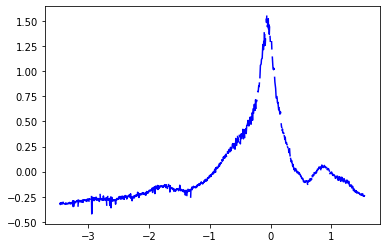

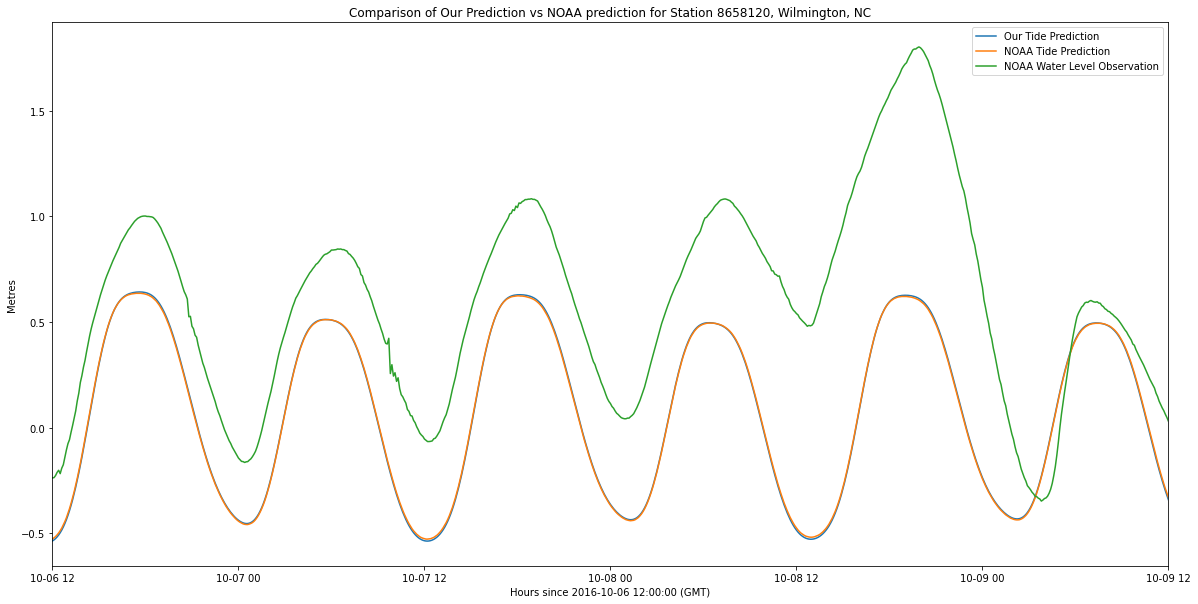

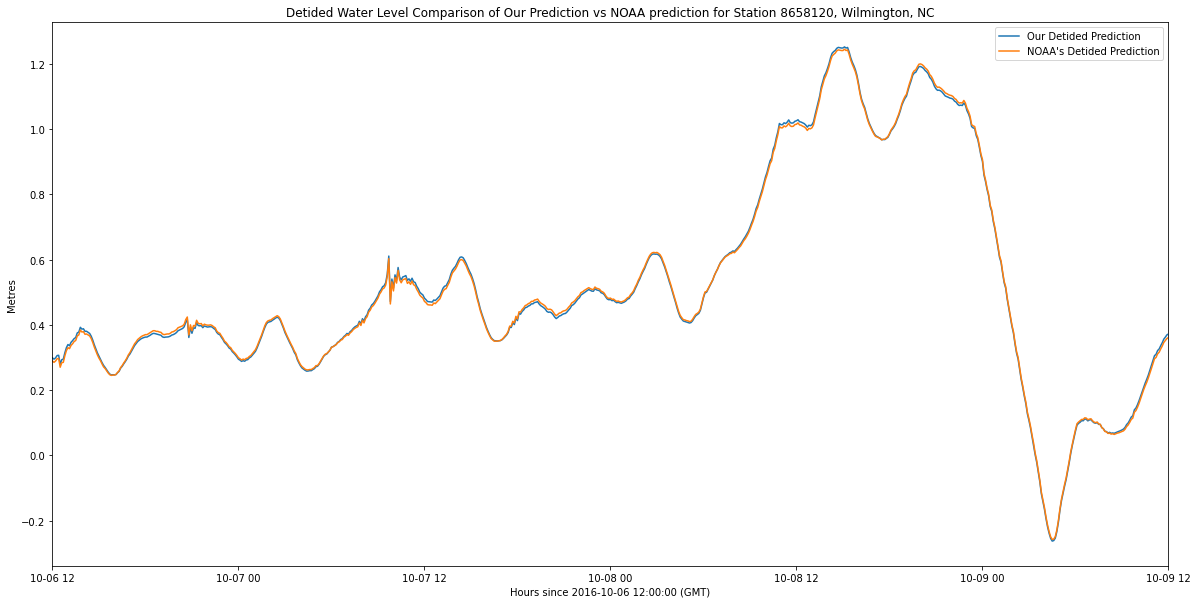

Using cached constituent data for station 8658120
Using cached water_level data for station 8658120
Using cached predictions data for station 8658120
Using cached constituent data for station 8721604
Using cached water_level data for station 8721604
Using cached predictions data for station 8721604


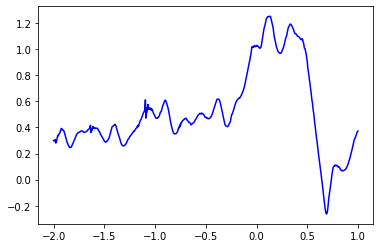

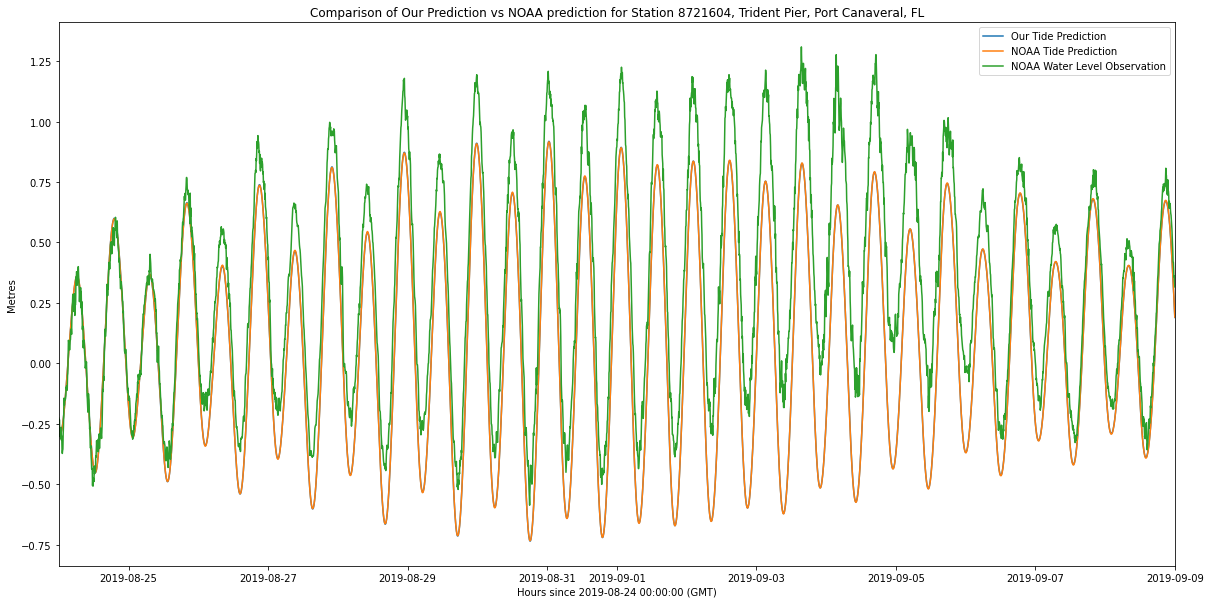

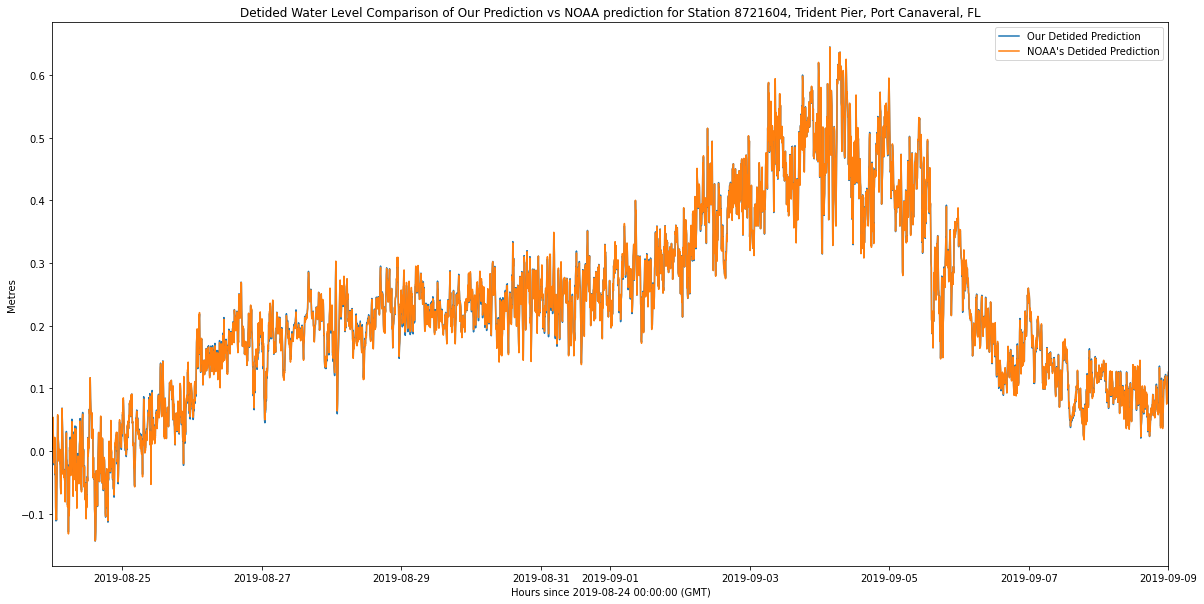

Using cached constituent data for station 8721604
Using cached water_level data for station 8721604
Using cached predictions data for station 8721604
Using cached constituent data for station 8723970
Using cached water_level data for station 8723970
Using cached predictions data for station 8723970


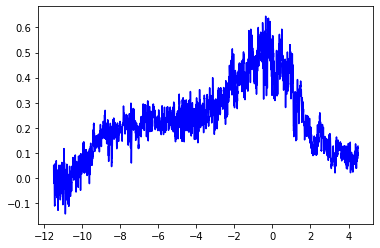

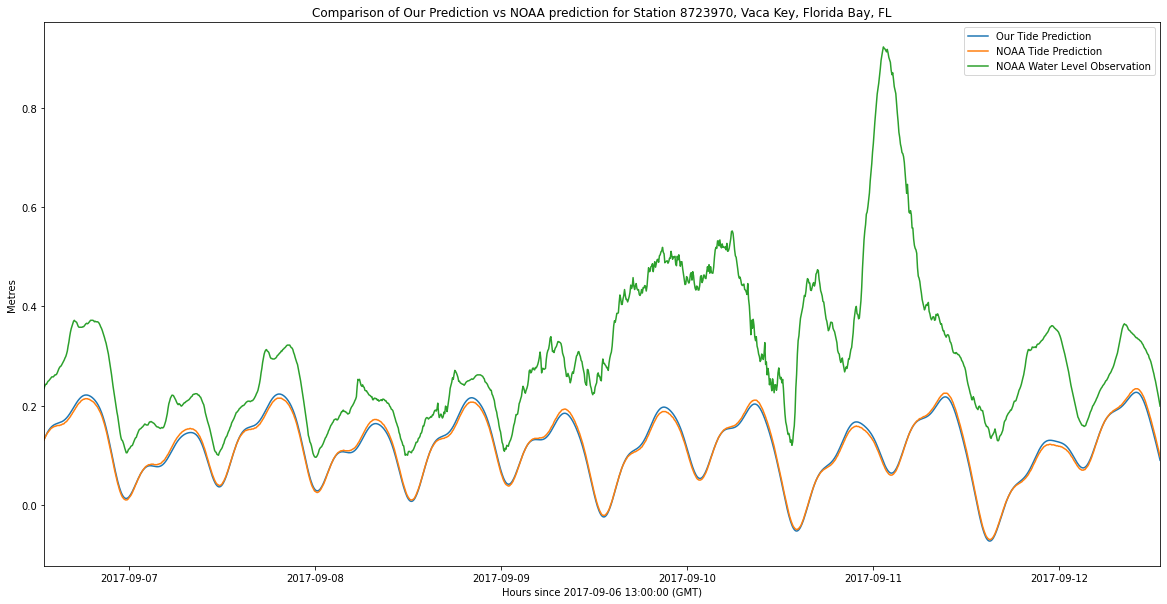

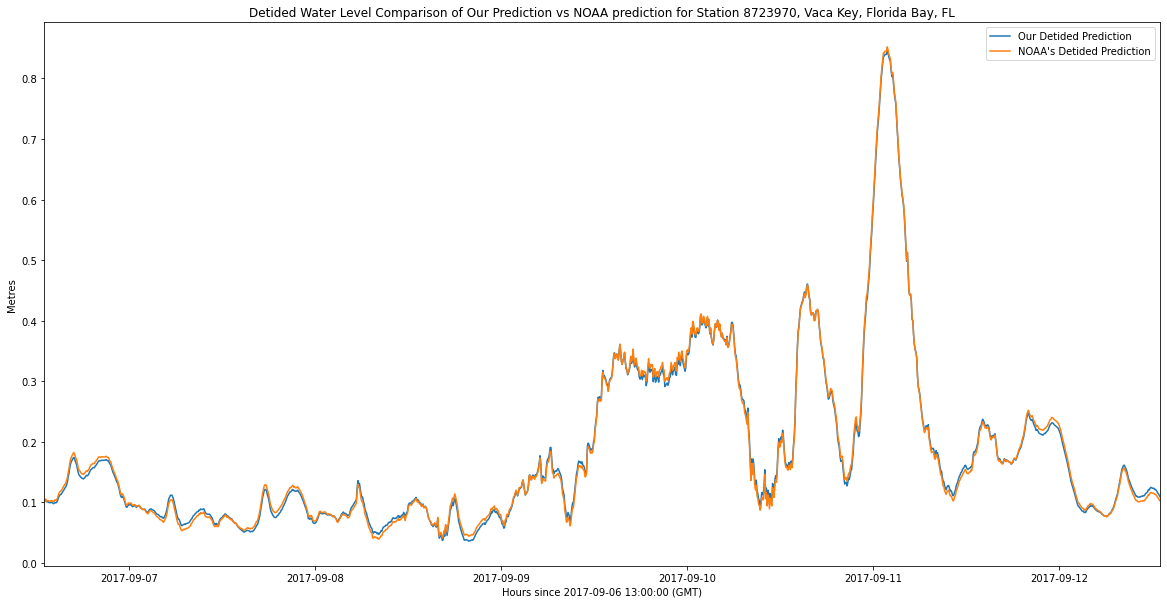

Using cached constituent data for station 8723970
Using cached water_level data for station 8723970
Using cached predictions data for station 8723970


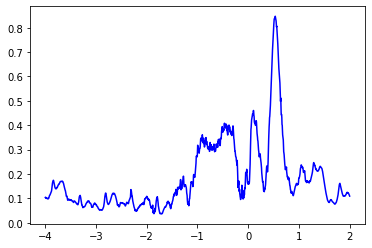

In [13]:
station_dict = {'8761724': ('Grand Isle, LA', (2005, 8, 26), (2005, 8, 31), (2005, 8, 29, 11, 10)), #katrina
                '8760922': ('Pilots Station East, SW Pass, LA', (2005, 8, 26), (2005, 8, 31), (2005, 8, 29, 11)), #michael
                '8658120': ('Wilmington, NC', (2016, 10, 6, 12), (2016, 10, 9, 12), (2016, 10, 8, 12)), #matthew
                '8721604': ('Trident Pier, Port Canaveral, FL', (2019, 8, 24), (2019, 9, 9), (2019, 9, 4, 12)), #dorian
                '8723970': ('Vaca Key, Florida Bay, FL', (2017, 9, 6, 13), (2017, 9, 12, 13), (2017, 9, 10, 13)) #irma
               }

for (key, value) in station_dict.items():
    station_id = key
    station_name = value[0]
    beg_date = datetime.datetime(*value[1])
    end_date = datetime.datetime(*value[2])
    landfall_date = datetime.datetime(*value[3])
    
    #NOAA Data Scraping Implementation
    predicted_tide = tide.predict_tide(station_id, beg_date, end_date) 
    
    times, NOAA_observed_water_lvl, NOAA_predicted_tide = tide.fetch_noaa_tide_data(station_id, beg_date, end_date, datum='MTL')

    #Detide Water Level
    surge = tide.detide(NOAA_observed_water_lvl, predicted_tide)
    NOAA_surge = tide.detide(NOAA_observed_water_lvl, NOAA_predicted_tide)
    
    #Plot Comparisons
    plt.figure(figsize=(20,10))
    plt.plot(times, predicted_tide, "-", label="Our Tide Prediction")
    plt.plot(times, NOAA_predicted_tide, "-", label="NOAA Tide Prediction")
    plt.plot(times, NOAA_observed_water_lvl, "-", label="NOAA Water Level Observation")
    plt.xlabel('Hours since ' + str(beg_date) + ' (GMT)')
    plt.ylabel('Metres'), plt.margins(x=0), plt.legend(loc = 'best')
    plt.title('Comparison of Our Prediction vs NOAA prediction for Station {}, {}'.format(station_id, station_name))
    plt.show()
    
    #Detided Water Level Comparison
    plt.figure(figsize=(20,10))
    plt.plot(times, surge, "-", label="Our Detided Prediction")
    plt.plot(times, NOAA_surge, "-", label="NOAA's Detided Prediction")
    plt.xlabel('Hours since ' + str(beg_date) + ' (GMT)')
    plt.ylabel('Metres'), plt.margins(x=0), plt.legend(loc = 'best')
    plt.title('Detided Water Level Comparison of Our Prediction vs NOAA prediction for Station {}, {}'.format(station_id, station_name))
    plt.show()
    
    
    #### Clawpack Implementation (in setplot.py) ####
    times, surge = tide.surge(station_id, beg_date, end_date, landfall_date)
    plt.plot(times, surge, color="b", label="Our Surge Prediction")
    
    